In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression as LR
from sklearn.linear_model import RandomizedLogisticRegression as RLR 

%matplotlib inline

In [6]:

filename = '../data/bankloan.xls'
df = pd.read_excel(filename)
x = df.iloc[:,:8].as_matrix()
y = df.iloc[:,8].as_matrix()


In [7]:
df.head()

,年龄,教育,工龄,地址,收入,负债率,信用卡负债,其他负债,违约
0,41,3,17,12,176,9.3,11.359392,5.008608,1
1,27,1,10,6,31,17.3,1.362202,4.000798,0
2,40,1,15,14,55,5.5,0.856075,2.168925,0
3,41,1,15,14,120,2.9,2.658720,0.821280,0
4,24,2,2,0,28,17.3,1.787436,3.056564,1


In [96]:
df.columns[[2,3]]

Index(['工龄', '地址'], dtype='object')

Question
---
which feauture(s) could affect actually violation? (binary regression, 0 and1)

In [77]:
rlr = RLR() 
rlr.fit(x, y) 

RandomizedLogisticRegression(C=1, fit_intercept=True,
               memory=Memory(cachedir=None), n_jobs=1, n_resampling=200,
               normalize=True, pre_dispatch='3*n_jobs', random_state=None,
               sample_fraction=0.75, scaling=0.5, selection_threshold=0.25,
               tol=0.001, verbose=False)

In [81]:
rlr.get_support(indices=True)

array([2, 3, 5, 6])

In [111]:
import numpy as np
cols=[]
for i in rlr.get_support(indices=True): cols=np.append(cols,df.columns[i])

In [123]:
print('Logistic model\n---')
print("sufficiebt Features: ",cols)

Logistic model
---
sufficiebt Features:  ['工龄' '地址' '负债率' '信用卡负债']


In [169]:
print('Validated Classifiers %s' % ','.join(df.columns[:8][rlr.get_support()]))

Validated Classifiers 工龄,地址,负债率,信用卡负债


In [138]:
df[cols][:5]

,工龄,地址,负债率,信用卡负债
0,17,12,9.3,11.359392
1,10,6,17.3,1.362202
2,15,14,5.5,0.856075
3,15,14,2.9,2.658720
4,2,0,17.3,1.787436


In [125]:
# x = df[data.columns[:8][rlr.get_support()]].as_matrix() 
x=df[cols]

In [129]:
lr = LR() #建立逻辑货柜模型
lr.fit(x, y) #用筛选后的特征数据来训练模型
print('Logistic Regression Model\n---')
print('Mean Accuarcy of model：%.4f ' % lr.score(x, y)) #给出模型的平均正确率，本例为81.4%

Logistic Regression Model
---
Mean Accuarcy of model：0.8143 


In [317]:
x_lr=lr.predict(x.values)

In [325]:
x_lr

array([1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1,

In [333]:
sum(y-x_lm)/len(y)

0.074285714285714288

Goodness-of-fit
---

In [340]:
def cm_plot(y, yp):
  
  from sklearn.metrics import confusion_matrix 

  cm = confusion_matrix(y, yp) 
  print(cm)
  import matplotlib.pyplot as plt 
  plt.matshow(cm, cmap=plt.cm.Reds) 
  plt.colorbar() 
  
  for x in range(len(cm)): 
    for y in range(len(cm)):
      plt.annotate(cm[x,y], xy=(x, y), color="blue",horizontalalignment='center', verticalalignment='center')
  
  plt.ylabel('True label') 
  plt.xlabel('Predicted label') 
  #plt.title("%s" %)
  return plt

[[478  39]
 [ 91  92]]


<module 'matplotlib.pyplot' from '/Users/cch/anaconda36/anaconda/lib/python3.6/site-packages/matplotlib/pyplot.py'>

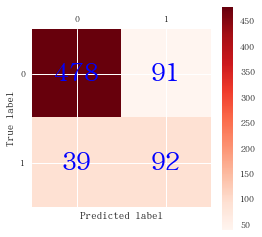

In [341]:
cm_plot(y,x_lm)

In [255]:
import matplotlib.font_manager
matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')

['/Library/Fonts/STIXIntUpReg.otf',
 '/Users/cch/Library/Fonts/LSTKClaBol.otf',
 '/Users/cch/Library/Fonts/SourceHanSansTWHK-Light.otf',
 '/Library/Fonts/STIXNonUniIta.otf',
 '/Library/Fonts/STIXGeneral.otf',
 '/Users/cch/Library/Fonts/SourceHanSansTWHK-Medium.otf',
 '/System/Library/Fonts/SFNSTextItalic.ttf',
 '/Users/cch/Library/Fonts/SourceHanSansTWHK-ExtraLight.otf',
 '/Library/Fonts/Trebuchet MS Bold Italic.ttf',
 '/Users/cch/Library/Fonts/SourceHanSansTWHK-Normal.otf',
 '/Library/Fonts/Tahoma Bold.ttf',
 '/System/Library/Fonts/Apple Braille Pinpoint 6 Dot.ttf',
 '/Library/Fonts/Brush Script.ttf',
 '/Users/cch/Library/Fonts/BOD_BLAI.TTF',
 '/Library/Fonts/STIXIntUpSmReg.otf',
 '/Users/cch/Library/Fonts/SourceHanSansTWHK-Bold.otf',
 '/Users/cch/Library/Fonts/segoeui.ttf',
 '/Library/Fonts/Zapfino.ttf',
 '/System/Library/Fonts/SFCompactRounded-Heavy.otf',
 '/Users/cch/Library/Fonts/Drugs.otf',
 '/Users/cch/Library/Fonts/SHLOP.TTF',
 '/usr/X11/lib/X11/fonts/TTF/luxirr.ttf',
 '/Librar

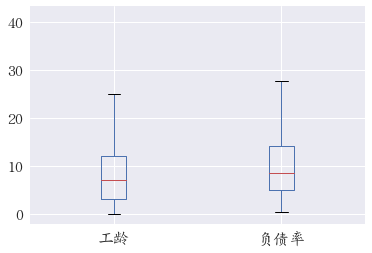

In [280]:
from matplotlib import font_manager,rcParams

#rcParams['font.family'] = 'AppleGothic' 
rcParams['font.family'] = 'AR PL New Kai' 
rcParams['font.weight'] = 'bold'

plt.rcParams['axes.unicode_minus'] = False 

x[[x.columns[0],x.columns[2]]].plot(kind="box",fontsize=16)
#x[x.columns[0]][y==0].plot(kind="bar")
#plt.show()

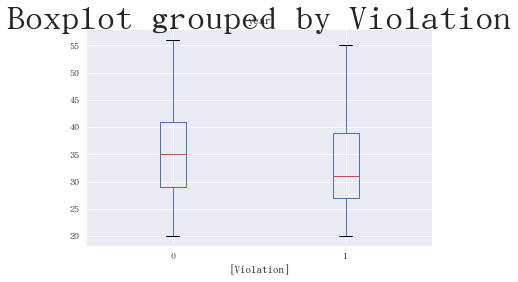

In [288]:
#x[[x.columns[0]]].plot(kind="box",fontsize=16,by=[x.columns[-1]])
df.boxplot(column=[df.columns[0]], by=[df.columns[-1]])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x12fe64cc0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x12fe1d278>], dtype=object)

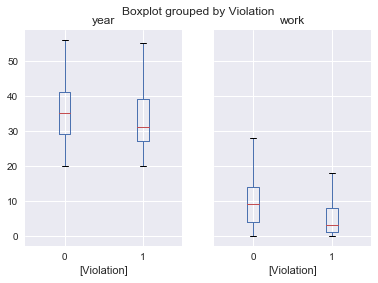

In [250]:
#x[[x.columns[0],x.columns[-1]]].plot(kind="box")
df.boxplot(column=[df.columns[0],df.columns[2]], by=[df.columns[-1]])

In [172]:
import seaborn as sns

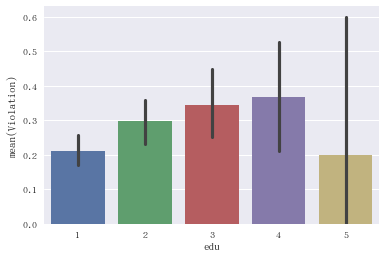

In [302]:
sns.barplot(df.columns[1], df.columns[-1],data=df)

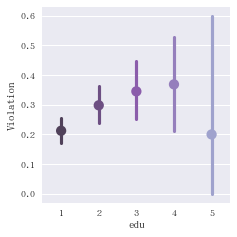

In [289]:
sns.factorplot(df.columns[1],df.columns[-1], data=df,palette="BuPu_d")


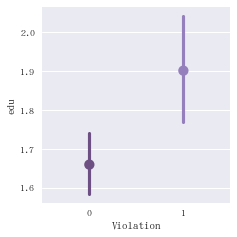

In [290]:
sns.factorplot(df.columns[-1],df.columns[1], data=df,palette="BuPu_d")


In [303]:
df.columns=['year','edu','work','address','income','debt','creditDebt','otherDebt','Violation']

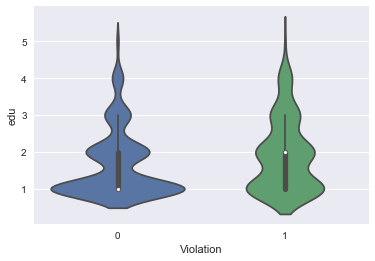

In [205]:
sns.violinplot(df[df.columns[-1]],df[df.columns[1]])

In [ ]:
df.columns[1]